#### Understanding of the Data mean and std calculation time in the dataloader

#### [Why normalization](https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2)

In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from tqdm.notebook import tqdm
from time import time

In [4]:
dataset = datasets.MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [5]:
from tqdm.notebook import tqdm as tqdm
# each dataset has image pixels value and label

# using the simple loops
starting_time = time()
# this calcualtes the total mean and the standard deviation
mean = torch.zeros(1)
standard_deviation = torch.zeros(1)
for i in range(len(dataset)):
    dataset[i][0].to(device)
    mean += dataset[i][0].mean()
    standard_deviation += dataset[i][0].std()

average_mean = mean / len(dataset)
average_standard_deviation = standard_deviation/len(dataset)

elapsed_time = time() - starting_time
print(f'Total elapsed time: {elapsed_time:.3f}: seconds')

Total elapsed time: 17.496: seconds


In [6]:
average_mean, average_standard_deviation

(tensor([0.1307]), tensor([0.3015]))

#### Can we speed this up?

In [7]:
# each dataset has image pixels value and label

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def calculate_mean_std(dataset):
    # using the simple loops
    starting_time = time()
    # this calcualtes the total mean and the standard deviation
    mean = torch.zeros(1).to(device)
    standard_deviation = torch.zeros(1).to(device)

    for i in range(len(dataset)):
        mean += dataset[i][0].mean()
        standard_deviation += dataset[i][0].std()

    average_mean = mean / len(dataset)
    average_standard_deviation = standard_deviation/len(dataset)

    elapsed_time = time() - starting_time

    print(f'Total elapsed time: {elapsed_time:.3f}: seconds')
    return average_mean, average_standard_deviation

In [8]:
calculate_mean_std(dataset)

Total elapsed time: 12.636: seconds


(tensor([0.1307]), tensor([0.3015]))

#### using data loader in form of batches

In [9]:

using_dataloader = []

# plotting the dataloading time 
def calculate_mean_std(dataloader):
    # using the simple loops
    starting_time = time()
    # this calcualtes the total mean and the standard deviation
    mean = torch.zeros(1).to(device)
    standard_deviation = torch.zeros(1).to(device)

    for images, _ in dataloader:
        mean += images.mean()
        standard_deviation += images.std()

    average_mean = mean / len(dataset)
    average_standard_deviation = standard_deviation/len(dataset)

    elapsed_time = time() - starting_time

    # print(f'Total elapsed time: {elapsed_time:.3f}: seconds')
    return average_mean, average_standard_deviation, elapsed_time

mnist_dataloader = torch.utils.data.DataLoader(dataset, shuffle = True, batch_size = 32)

# calculate_mean_std(mnist_dataloader)

In [10]:
batch_variation = [1,2,4,8,16,32,64]

for batch in batch_variation:
    batch_data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch)
    mean, std, elapsed_time = calculate_mean_std(batch_data_loader)
    using_dataloader.append(elapsed_time)

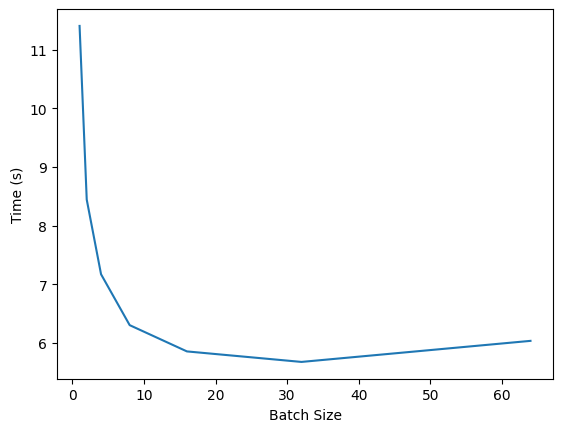

In [11]:
from matplotlib import pyplot as plt
plt.plot(batch_variation, using_dataloader)
plt.xlabel('Batch Size')
plt.ylabel('Time (s)')
plt.show()


#### Testing the performance along the cuda device

### Conclusion: The optimal time is given by using the Dataloader. Since it gives the performance over the batch of the dataset. Also, the batch size of 32 is ideal for the performance.